In [11]:
with open('Desktop/n2.txt', 'r') as f:
    text = f.read()
    news = text.split("\n\n")
    count = {'sport': 0, 'world': 0, "us": 0, "business": 0, "health": 0, "entertainment": 0, "sci_tech": 0}
    for news_item in news:
        lines = news_item.split("\n")
        print(lines[6])
        file_to_write = open('Desktop/data/' + lines[6] + '/' + str(count[lines[6]]) + '.txt', 'w+')
        count[lines[6]] = count[lines[6]] + 1
        file_to_write.write(news_item)  # python will convert \n to os.linesep
        file_to_write.close()

sport
business
sport
entertainment
us
entertainment
world
business
business
world
us
sport
entertainment
sport
world
health
world
world
us
entertainment
sport
us
us
sport
entertainment
world
business
sport
world
sci_tech
sport
entertainment
business
us
sport
world
world
sport
us
world
sci_tech
sport
health
entertainment
business
us
entertainment
entertainment
sport
sport
entertainment
us
entertainment
business
us
sport
sport
sport
entertainment
business
business
sport
entertainment
us
world
sport
sci_tech
sport
us
sport
business
sport
us
business
us
us
us
world
entertainment
business
world
business
sport
sport
sport
business
world
health
sport
sci_tech
world
entertainment
entertainment
sport
world
world
health
health
business
world
sport
sport
sport
sport
health
world
sport
sport
world
sport
world
world
health
world
world
sport
business
us
us
world
sport
health
business
sport
sport
world
world
us
sport
us
world
business
entertainment
us
entertainment
sci_tech
us
us
business
us
entertai

sport
entertainment
business
business
sport
sport
us
us
health
world
sport
sport
entertainment
us
sport
us
world
business
sport
entertainment
us
business
sport
entertainment
world
us
world
business
sport
sport
us
sci_tech
entertainment
world
world
sport
sport
sci_tech
sport
us
business
sport
business
sport
sci_tech
world
business
sport
us
business
world
sport
sport
business
entertainment
us
business


IndexError: list index out of range

In [12]:
import pandas
import glob

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]
directory_list = ["Desktop/data/sport/*.txt", "Desktop/data/world/*.txt","Desktop/data/us/*.txt","Desktop/data/business/*.txt","Desktop/data/health/*.txt","Desktop/data/entertainment/*.txt","Desktop/data/sci_tech/*.txt",]

text_files = list(map(lambda x: glob.glob(x), directory_list))
text_files = [item for sublist in text_files for item in sublist]

training_data = []


for t in text_files:
    f = open(t, 'r')
    f = f.read()
    t = f.split('\n')
    training_data.append({'data' : t[0] + ' ' + t[1], 'flag' : category_list.index(t[6])})
    
training_data[0]

{'data': "court agrees to expedite n.f.l.'s appeal the decision means a ruling could be made nearly two months before the regular season begins, time for the sides to work out a deal without delaying the season.",
 'flag': 0}

In [19]:
training_data = pandas.DataFrame(training_data, columns=['data', 'flag'])
training_data.to_csv("train_data.csv", sep=',', encoding='utf-8')
print(training_data.data.shape)

(1433,)


In [15]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer


#GET VECTOR COUNT
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.data)

#SAVE WORD VECTOR
pickle.dump(count_vect.vocabulary_, open("count_vector.pkl","wb"))

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer

#TRANSFORM WORD VECTOR TO TF IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#SAVE TF-IDF
pickle.dump(tfidf_transformer, open("tfidf.pkl","wb"))

In [143]:

# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#clf = MultinomialNB().fit(X_train_tfidf, training_data.flag)
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=72)
clf = MultinomialNB().fit(X_train, y_train)

#SAVE MODEL
pickle.dump(clf, open("nb_model.pkl", "wb"))

In [131]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = "a report from jpmorgan chase notes that companies hoping to compete with the apple ipad"
docs_new = [docs_new]

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("nb_model.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print(category_list[predicted[0]])

business


sport  -  health
sport  -  sport
entertainment  -  entertainment
business  -  business
world  -  world
business  -  business
us  -  us
sport  -  sci_tech
business  -  business
sport  -  entertainment
business  -  business
us  -  us
business  -  business
sport  -  sport
sport  -  sport
business  -  health
sport  -  entertainment
sport  -  sport
sport  -  entertainment
sport  -  sport
world  -  world
sport  -  us
entertainment  -  entertainment
sport  -  sport
world  -  health
business  -  health
business  -  sci_tech
sport  -  entertainment
world  -  world
business  -  business
world  -  world
sport  -  sport
sport  -  sport
sport  -  sport
business  -  sci_tech
world  -  world
business  -  business
us  -  us
business  -  business
world  -  health
sport  -  sport
business  -  business
sport  -  sport
business  -  us
world  -  world
sport  -  sport
world  -  world
sci_tech  -  sci_tech
sport  -  sport
sport  -  business
sport  -  health
world  -  business
sport  -  sci_tech
entertainment

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


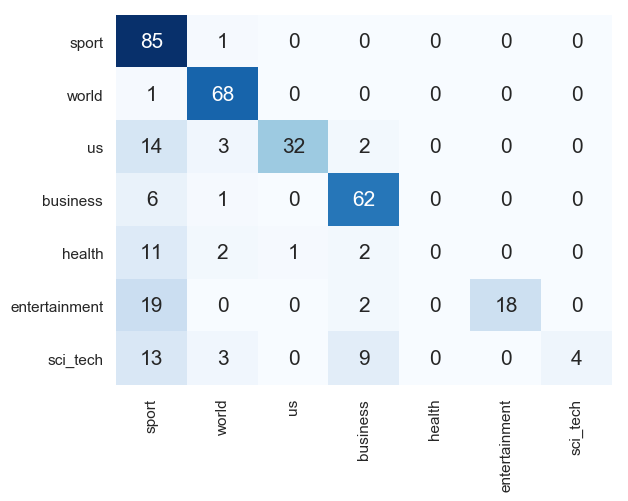

In [156]:
predicted = loaded_model.predict(X_test)
result_bayes = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_bayes.to_csv('res_bayes.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])
from sklearn.metrics import confusion_matrix  

confusion_mat = confusion_matrix(y_test,predicted)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
f1=f1_score(y_test,predicted,average=None)
print(f1)
r1=accuracy_score(y_test,predicted)
print(classification_report(y_test,predicted))
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
df_cm = pd.DataFrame(confusion_mat, category_list,
                  category_list)
sn.set(font_scale=1)#for label size
print('Confusion matrix of Multinomial NB')
sn.heatmap(df_cm,annot_kws={"size": 15},cmap="Blues",annot=True,cbar=False,fmt='g')

In [145]:
from sklearn.neural_network import MLPClassifier

clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=72)

clf_neural.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [146]:
pickle.dump(clf_neural, open("softmax.pkl", "wb"))

us  -  health
sport  -  sport
entertainment  -  entertainment
business  -  business
world  -  world
business  -  business
entertainment  -  us
us  -  sci_tech
business  -  business
sci_tech  -  entertainment
business  -  business
us  -  us
us  -  business
business  -  sport
entertainment  -  sport
business  -  health
us  -  entertainment
sport  -  sport
us  -  entertainment
sport  -  sport
world  -  world
us  -  us
entertainment  -  entertainment
sport  -  sport
business  -  health
entertainment  -  health
business  -  sci_tech
sport  -  entertainment
world  -  world
health  -  business
health  -  world
sport  -  sport
sport  -  sport
sport  -  sport
business  -  sci_tech
world  -  world
business  -  business
health  -  us
business  -  business
world  -  health
sport  -  sport
business  -  business
sport  -  sport
business  -  us
world  -  world
sport  -  sport
world  -  world
sci_tech  -  sci_tech
sport  -  sport
sport  -  business
business  -  health
business  -  business
sci_tech  -

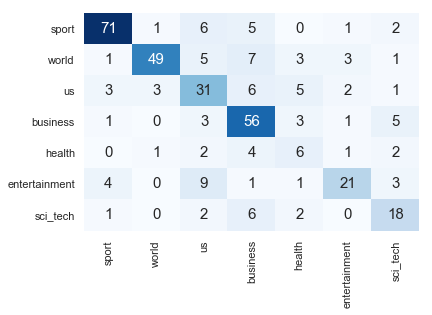

In [147]:
predicted = clf_neural.predict(X_test)
result_softmax = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_softmax.to_csv('res_softmax.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])
from sklearn.metrics import confusion_matrix  

confusion_mat1 = confusion_matrix(y_test,predicted)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
r2=accuracy_score(y_test,predicted)
print(r2)
print(classification_report(y_test,predicted))
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
df_cm = pd.DataFrame(confusion_mat1, category_list,
                 category_list )
sn.set(font_scale=1)#for label size
print('Confusion matrix of k-means for Tf-IDF')
sn.heatmap(df_cm,annot_kws={"size": 15},cmap="Blues",annot=True,cbar=False,fmt='g')

In [148]:
from sklearn import svm
clf_svm = svm.LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=72)
clf_svm.fit(X_train_tfidf, training_data.flag)
pickle.dump(clf_svm, open("svm.pkl", "wb"))

In [149]:
predicted = clf_svm.predict(X_test)
result_svm = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_svm.to_csv('res_svm.csv', sep = ',')
for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])
from sklearn.metrics import confusion_matrix  

cm = confusion_matrix(y_test,predicted)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

r3=accuracy_score(y_test,predicted)
print(classification_report(y_test,predicted))

health  -  health
sport  -  sport
entertainment  -  entertainment
business  -  business
world  -  world
business  -  business
us  -  us
sci_tech  -  sci_tech
business  -  business
entertainment  -  entertainment
business  -  business
us  -  us
business  -  business
sport  -  sport
sport  -  sport
health  -  health
entertainment  -  entertainment
sport  -  sport
entertainment  -  entertainment
sport  -  sport
world  -  world
us  -  us
entertainment  -  entertainment
sport  -  sport
health  -  health
health  -  health
sci_tech  -  sci_tech
entertainment  -  entertainment
world  -  world
business  -  business
world  -  world
sport  -  sport
sport  -  sport
sport  -  sport
sci_tech  -  sci_tech
world  -  world
business  -  business
us  -  us
business  -  business
health  -  health
sport  -  sport
business  -  business
sport  -  sport
us  -  us
world  -  world
sport  -  sport
world  -  world
sci_tech  -  sci_tech
sport  -  sport
business  -  business
health  -  health
business  -  business


Confusion matrix of k-means for Tf-IDF


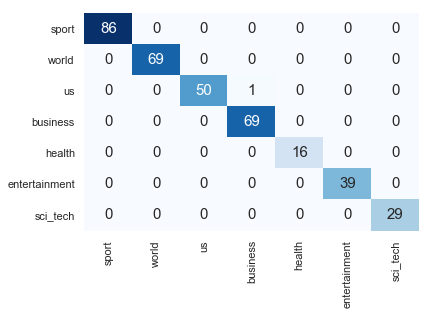

In [150]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
df_cm = pd.DataFrame(cm, category_list,
                 category_list )
sn.set(font_scale=1)#for label size
print('Confusion matrix of k-means for Tf-IDF')
sn.heatmap(df_cm,annot_kws={"size": 15},cmap="Blues",annot=True,cbar=False,fmt='g')

In [101]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = "a report from jpmorgan chase notes that companies hoping to compete with the apple ipad"
docs_new = [docs_new]

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("svm.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print(category_list[predicted[0]])

sci_tech


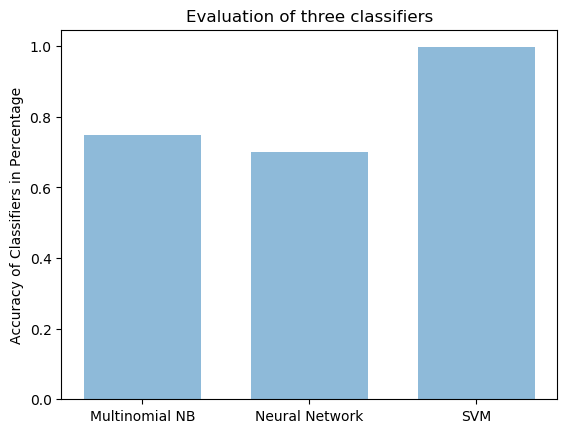

In [175]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Multinomial NB', 'Neural Network','SVM')
y_pos = np.arange(len(objects))
performance = [r1,r2,r3]
plt.bar(y_pos, performance, align='center',width=.7, alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy of Classifiers in Percentage')
plt.title('Evaluation of three classifiers')
plt.show()

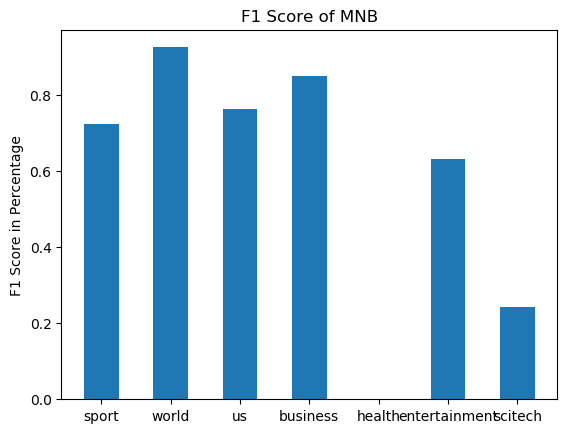

In [173]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ("sport", "world", "us", "business", "health", "entertainment", "scitech")
y_pos = np.arange(len(objects))
performance = f1
plt.bar(y_pos, performance, align='center',width=.5, alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('F1 Score in Percentage')
plt.title('F1 Score of MNB')
plt.show()